In [1]:
from lsst.daf.butler import Butler
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

In [2]:
run = 'E1154'

## Check what collections are related to {{run}}

In [3]:
butler.registry.queryCollections(f'*{run}*')

['u/lsstccs/ptc_E1154_w_2024_35/20241011T205545Z',
 'u/lsstccs/eo_bf_analysis_E1154_w_2024_35/20241012T114952Z',
 'u/lsstccs/eo_linearity_plots_E1154_w_2024_35/20241012T114828Z',
 'u/lsstccs/eo_ptc_plots_E1154_w_2024_35/20241012T114554Z',
 'u/lsstccs/ptc_E1154_w_2024_35',
 'u/lsstccs/eo_bf_analysis_E1154_w_2024_35',
 'u/lsstccs/eo_linearity_plots_E1154_w_2024_35',
 'u/lsstccs/eo_ptc_plots_E1154_w_2024_35']

## Check what data types are related to the collections to related to {{run}}

In [4]:
collections = 'u/lsstccs/eo_linearity_plots_E1154_w_2024_35'
subregistry = butler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,
                                                     collections=collections,
                                                     findFirst=True))
        if len(datasetRefs)==0:
            continue
        print(len(datasetRefs), dtype )
    except:
        print("Error", dtype )

5097868 DatasetType('raw', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure)
205 DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
1 DatasetType('camera', {instrument}, Camera, isCalibration=True)
205 DatasetType('dark', {instrument, detector}, ExposureF, isCalibration=True)
205 DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
205 DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
1 DatasetType('packages', {}, Packages)
205 DatasetType('cpDarkForDefectsCombine_log', {instrument, detector}, ButlerLogRecords)
1 DatasetType('cpBiasCombine_config', {}, Config)
1 DatasetType('cpBiasIsr_config', {}, Config)
4100 DatasetType('cpBiasIsrExp', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure)
4100 DatasetType('cpBiasIsr_log', {band, instrument, day_obs, detector, group, physical_filter, exposure}, ButlerLogRecords)
4100 DatasetType('

## Get the DM number associated to the sensor we want to look, here it is R01/S11

In [5]:
sensor="R01_S11"
detector=list(butler.registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

4

## check one of datatype, which we know above

In [6]:
linearity_results = butler.get('linearity_results', collections=collections, detector=detector)
linearity_results

""


hmm, no result is produced. Let's see what is log output.

In [7]:
linearityPlots_log = butler.get('linearityPlots_log', collections=collections, detector=detector)
print(linearityPlots_log)

INFO 2024-10-12T11:52:59.813928+00:00 lsst.ctrl.mpexec.singleQuantumExecutor singleQuantumExecutor.py:207 - Preparing execution of quantum for label=linearityPlots dataId={instrument: 'LSSTCam', detector: 4}.
VERBOSE 2024-10-12T11:53:02.219896+00:00 lsst.daf.butler.datastores.fileDatastore fileDatastore.py:1538 - Number of datasets found in datastore: 826 out of 826 datasets checked.
INFO 2024-10-12T11:53:02.230662+00:00 lsst.ctrl.mpexec.singleQuantumExecutor singleQuantumExecutor.py:261 - Constructing task and executing quantum for label=linearityPlots dataId={instrument: 'LSSTCam', detector: 4}.
WARNING 2024-10-12T11:53:11.897506+00:00 py.warnings warnings.py:110 - /cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2024_35/conda/envs/lsst-scipipe-9.0.0-exact/share/eups/Linux64/ip_isr/g6bb7d3c5bc+3afead4242/python/lsst/ip/isr/photodiode.py:317: RuntimeWarning: invalid value encountered in scalar divide
  bg_current = np.sum(charge[bg])/np.sum(dt[bg])

WARNING 2024-10-12T11:53:11.914031+00:

A lot of complains related to photodiode???

In [8]:

exposures = list(butler.registry.queryDimensionRecords("exposure", 
                    where=f"exposure.science_program='{run}' and instrument='LSSTCam' and exposure.observation_reason='flat' and exposure.observation_type='flat'"))
exposures

[exposure.RecordClass(instrument='LSSTCam', id=2024093000109, day_obs=20240930, group='2024093000109', physical_filter='none', obs_id='MC_C_20240930_000109', exposure_time=15.0, dark_time=15.2998, observation_type='flat', observation_reason='flat', seq_num=109, seq_start=109, seq_end=109, target_name='UNKNOWN', science_program='E1154', tracking_ra=None, tracking_dec=None, sky_angle=None, azimuth=None, zenith_angle=None, has_simulated=False, can_see_sky=None, timespan=Timespan(begin=astropy.time.Time('2024-09-30 20:23:17.130999', scale='tai', format='iso'), end=astropy.time.Time('2024-09-30 20:23:32.431000', scale='tai', format='iso'))),
 exposure.RecordClass(instrument='LSSTCam', id=2024093000110, day_obs=20240930, group='2024093000110', physical_filter='none', obs_id='MC_C_20240930_000110', exposure_time=15.0, dark_time=15.1013, observation_type='flat', observation_reason='flat', seq_num=110, seq_start=110, seq_end=110, target_name='UNKNOWN', science_program='E1154', tracking_ra=None,

In [9]:
photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=exposures[0].id)
photodiode

In [10]:
photodiode.integrate()

3.3293955e-10

In [11]:
import pylab
import traceback
import tqdm

 60%|█████▉    | 496/827 [00:12<00:08, 40.88it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_42793/3356744551.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/ge90bb0f836+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1145, in get
    ref = self._findDatasetRef(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/ge90bb0f836+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 899, in _findDatasetRef
    raise DatasetNotFoundError(
lsst.daf.butler._exceptions.DatasetNotFoundError: Dataset photodiode with data ID {instrument: 'LSSTCam', exposure: 2024093000895} could not b

2024093000895


100%|██████████| 827/827 [00:21<00:00, 39.34it/s]


Text(0, 0.5, 'CURRENT')

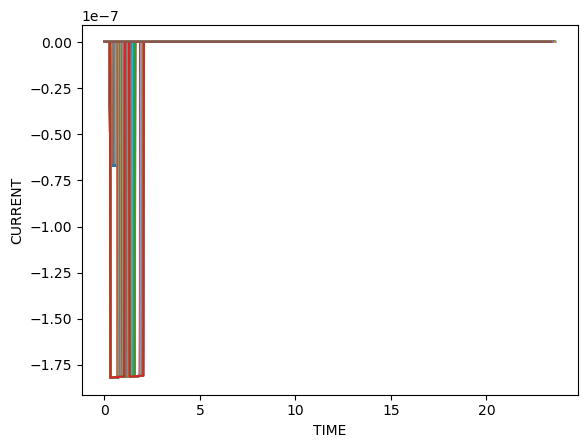

In [33]:
for anexposure in tqdm.tqdm(list(exposures)[::]):
    try:
        photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.plot(table['TIME'].T, table['CURRENT'].T,"-")     ### I think there is a bug in to_Table
    except:
        print(anexposure.id)
        traceback.print_exc()
pylab.xlabel('TIME')
pylab.ylabel('CURRENT')

0.011081 .. 23.3808


In [ ]:
for anexposure in tqdm.tqdm(list(exposures)[::]):
    try:
        photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.scatter( photodiode.getMetadata()['EXPOSURE'], photodiode.integrate() )
    except:
        print(anexposure.id)
        traceback.print_exc()
pylab.xlabel('EXPOSURE')
pylab.ylabel('INTEGRATED CURRENT')

 18%|█▊        | 149/827 [00:04<00:18, 37.40it/s]